In [60]:

import pydotplus
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('/content/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [62]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [64]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

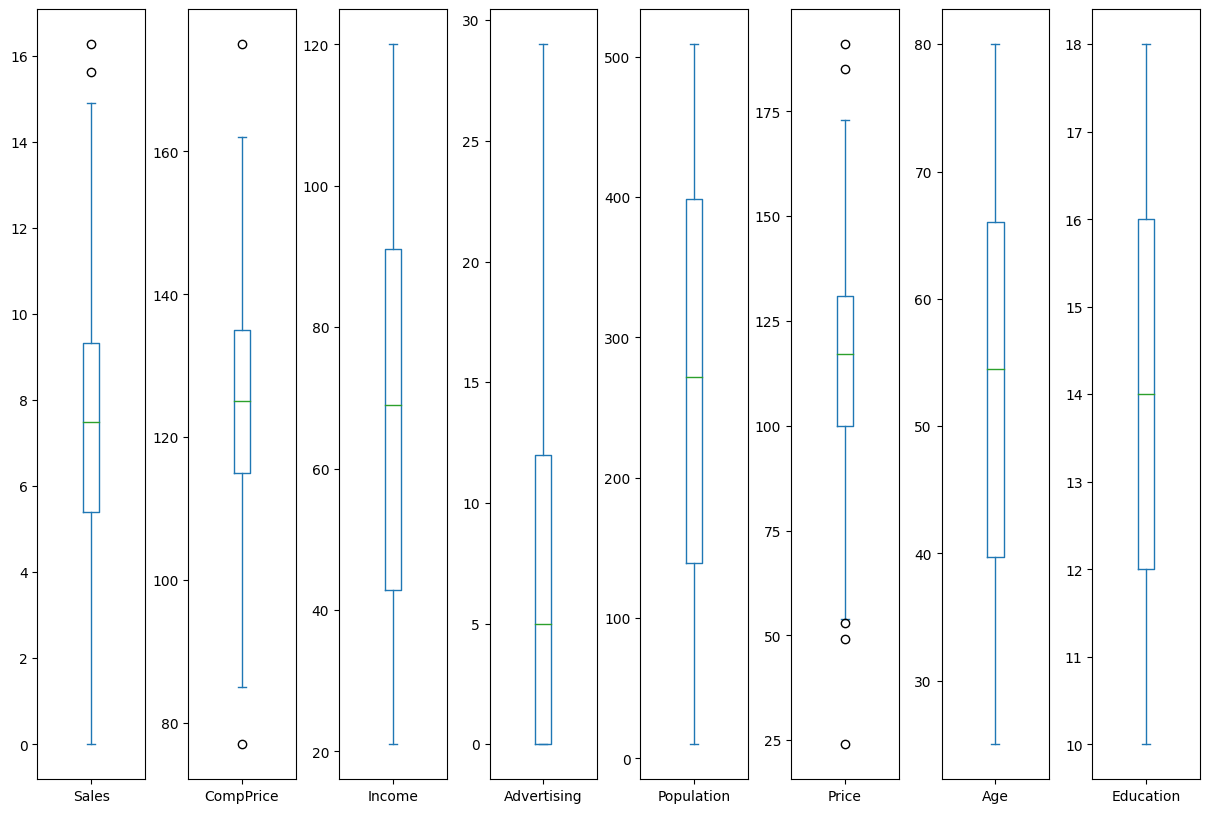

In [65]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 10)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()




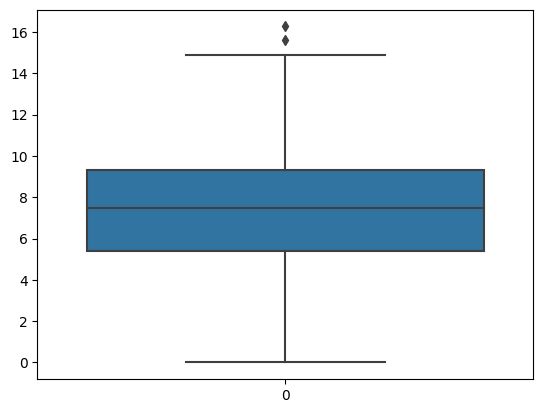

In [66]:
bossales=sns.boxplot(df['Sales'])

In [67]:
#there are two otliers in sales column

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


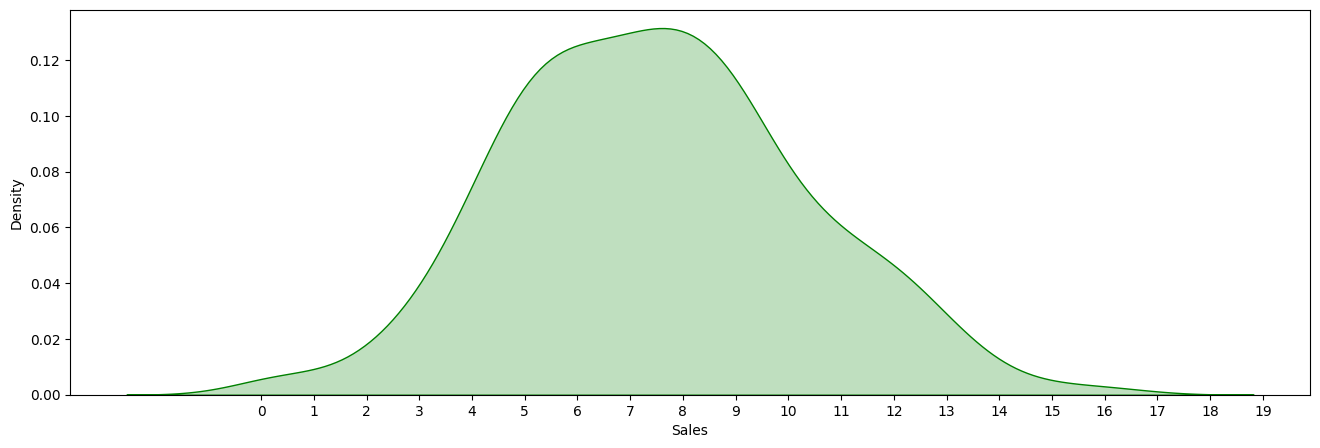

In [68]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

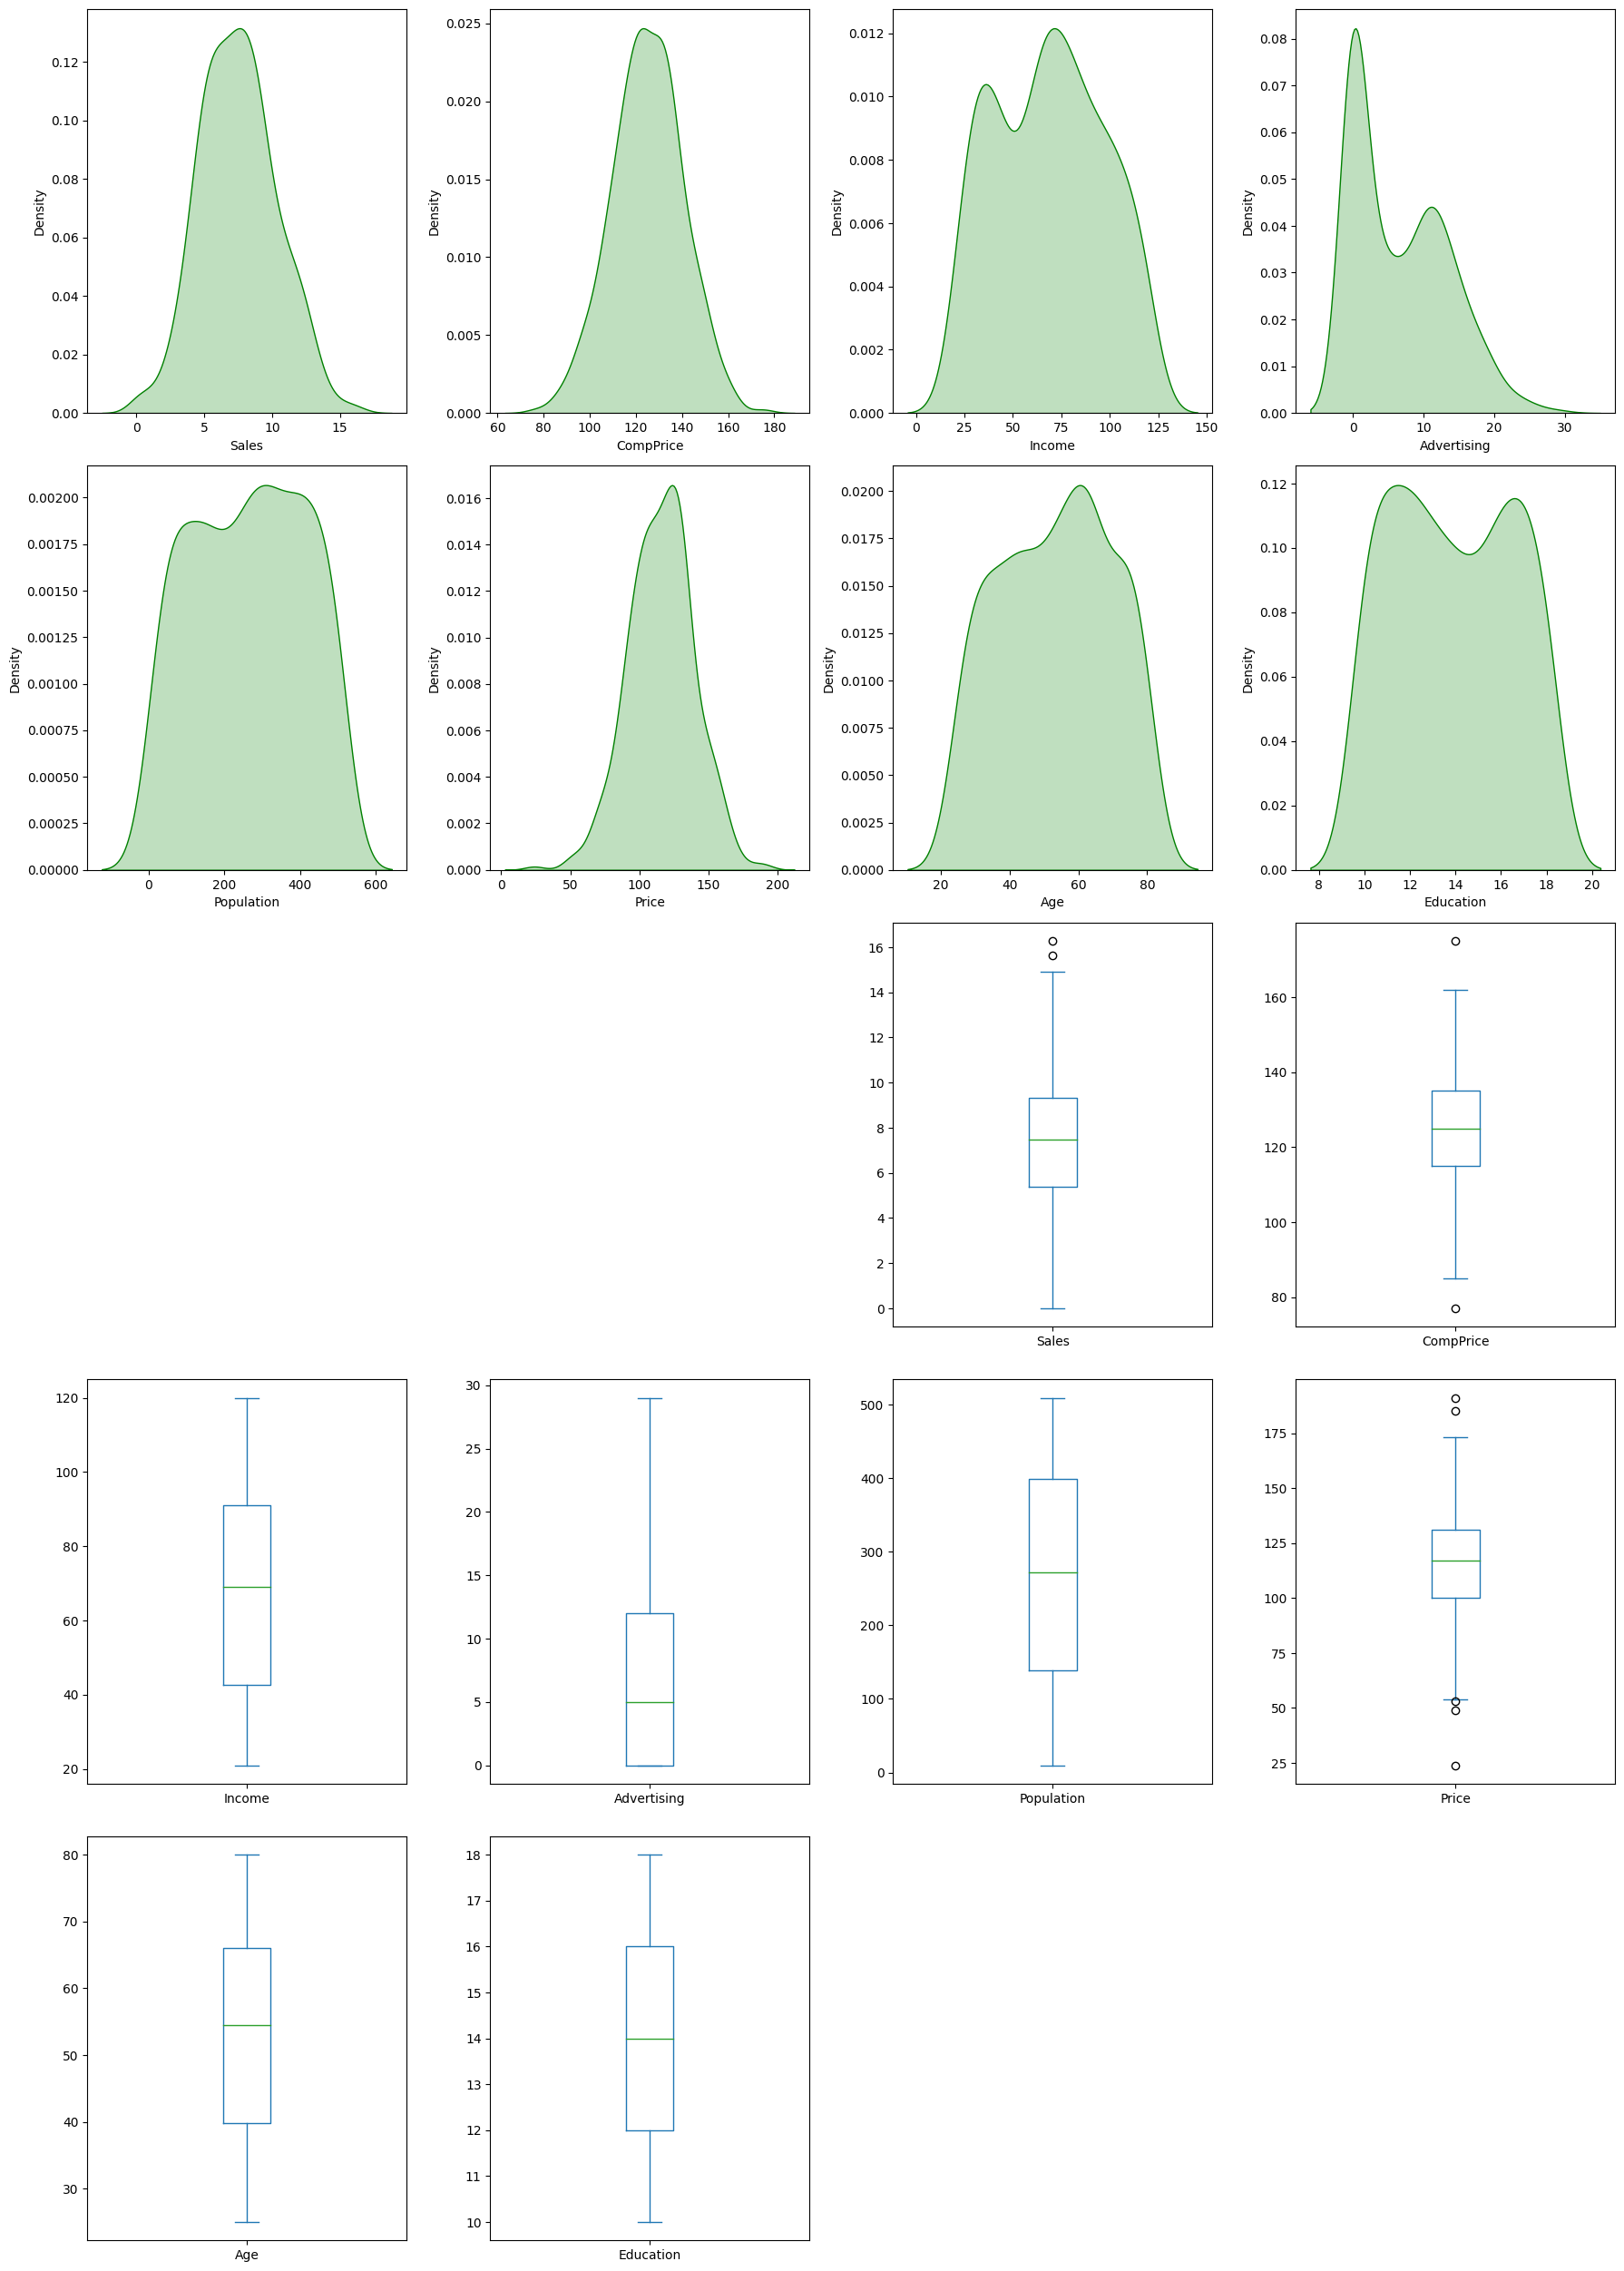

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [69]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [70]:
df1= pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

In [71]:
corr=df1.corr()

<Axes: >

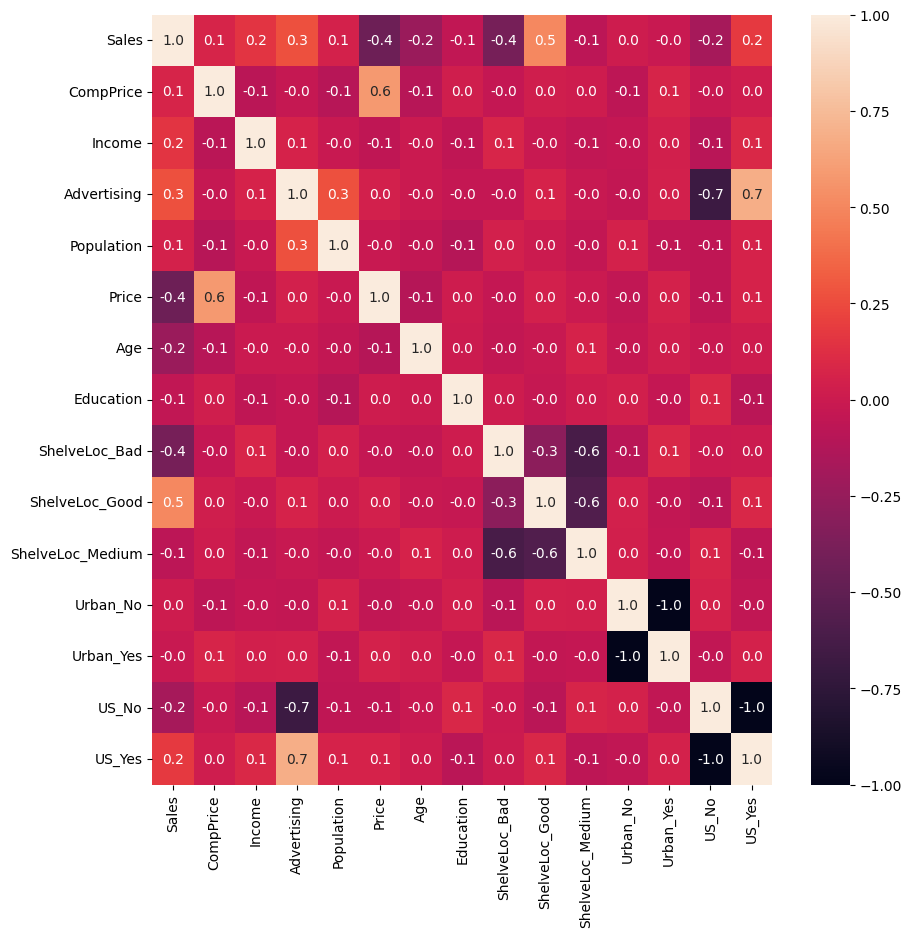

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".1f")

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [73]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [74]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [80]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [81]:

model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
pred_train = model.predict(x_train)

In [84]:
accuracy_score(y_train,pred_train)

1.0

In [86]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]])

In [92]:
pred_test=model.predict(x_test)

In [94]:
accuracy_score(y_test,pred_test)

0.775

In [95]:
confusion_matrix(y_test,pred_test)

array([[30, 10],
       [ 8, 32]])

In [99]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
184,large,large
33,large,large
86,large,small
373,small,large
163,small,large
...,...,...
62,small,small
2,large,small
224,small,small
292,large,large


In [101]:
cols = list(df1.columns)
predictors = cols[0:14]
target = cols[14]
dot_data = StringIO()
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('company_full.png')

True

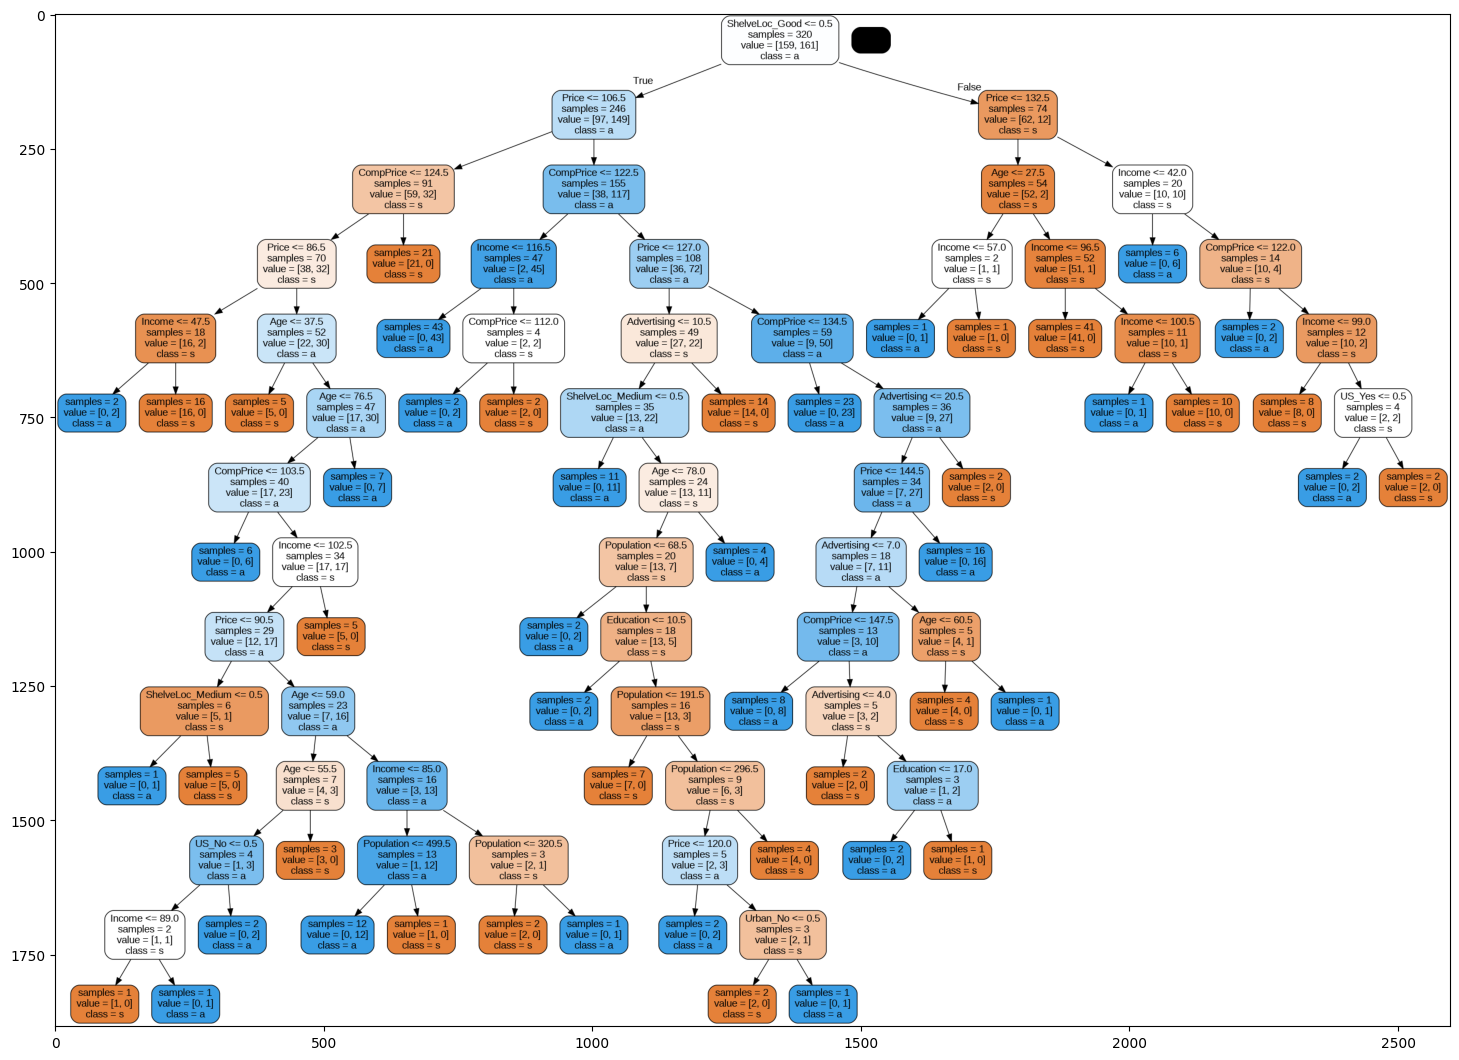

In [103]:
img = mpimg.imread('company_full.png')
plt.figure(figsize=(18,40))
plt.imshow(img)

In [105]:
model.feature_importances_

array([0.17187444, 0.1523793 , 0.07905675, 0.0545758 , 0.25230155,
       0.09308405, 0.02174681, 0.        , 0.10831631, 0.04166427,
       0.00860927, 0.        , 0.00389109, 0.01250035])

In [106]:
fi = pd.DataFrame({'feature': list(x_train.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.252302
0,CompPrice,0.171874
1,Income,0.152379
8,ShelveLoc_Good,0.108316
5,Age,0.093084
2,Advertising,0.079057
3,Population,0.054576
9,ShelveLoc_Medium,0.041664
6,Education,0.021747
13,US_Yes,0.012500


As seen in the above table Price is most important feature